In [4]:
import pandas as pd


In [5]:
# Load the new dataset
file_path = "C:/Users/Lenovo/Desktop/monthly-beer-production-in-austr.csv"
df_beer = pd.read_csv(file_path)

# Display basic information and first few rows
df_beer.info(), df_beer.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


(None,
      Month  Monthly beer production
 0  1956-01                     93.2
 1  1956-02                     96.0
 2  1956-03                     95.2
 3  1956-04                     77.1
 4  1956-05                     70.9)

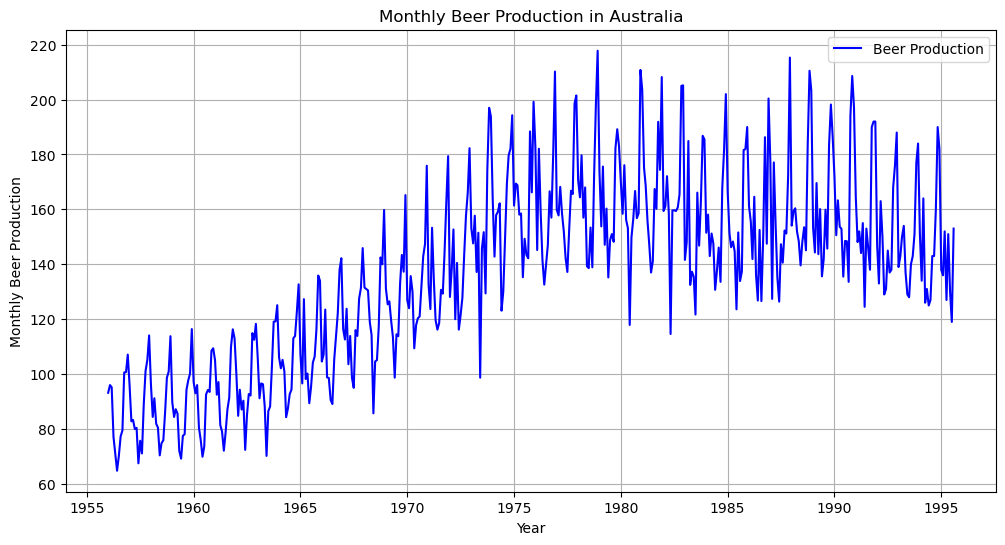

In [6]:
 import matplotlib.pyplot as plt

# Convert 'Month' to datetime format
df_beer['Month'] = pd.to_datetime(df_beer['Month'])

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_beer['Month'], df_beer['Monthly beer production'], label="Beer Production", color="blue")
plt.xlabel("Year")
plt.ylabel("Monthly Beer Production")
plt.title("Monthly Beer Production in Australia")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [13]:
# Load the dataset
file_path = "C:/Users/Lenovo/Desktop/monthly-beer-production-in-austr.csv"


In [14]:
# Convert 'Month' to datetime format
df_beer['Month'] = pd.to_datetime(df_beer['Month'])


In [16]:
# Create a numerical feature representing time (months since start)
df_beer['Time'] = (df_beer['Month'] - df_beer['Month'].min()).dt.days // 30

In [17]:
# Define features (X) and target variable (y)
X = df_beer[['Time']].values  # Time as independent variable
y = df_beer['Monthly beer production'].values  # Beer production as dependent variable

In [18]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [19]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict on test data
y_pred = model.predict(X_test)


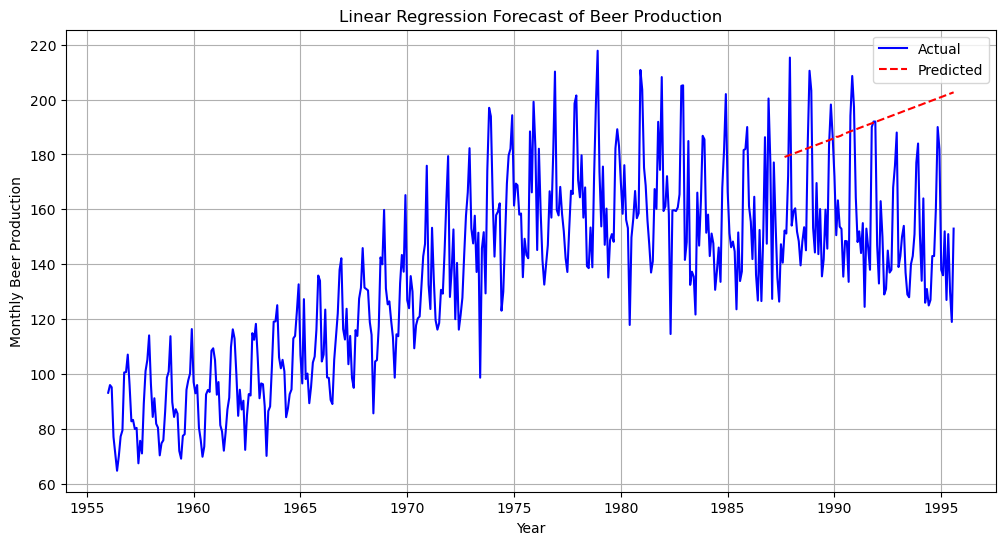

In [21]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(df_beer['Month'], df_beer['Monthly beer production'], label="Actual", color="blue")
plt.plot(df_beer.iloc[len(X_train):]['Month'], y_pred, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Monthly Beer Production")
plt.title("Linear Regression Forecast of Beer Production")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score
